# Name(s)
**Ethan Moore and Ajay Patel**

## Should we grade this notebook? (Answer yes or no)

YES

**Instructions:** Pair programming assignment. Submit only a single notebook unless you deviate significantly after lab on Thursday. If you submit individually, make sure you indicate who you worked with originally. Make sure to include your first and last names. For those students who push to individual repos but still work in groups, please indicate which notebook should be graded.

# Applying page rank

## Lab Assignment

This is a pair programming assignment. I strongly
discourage individual work for this (and other team/pair programming) lab(s), even if you think you can do it
all by yourself. Also, this is a pair programming assignment, not a ”work in teams of two” assignment. Pair
programming requires joint work on all aspects of the project without delegating portions of the work to individual
1
team members. For this lab, I want all your work — discussion, software development, analysis of the results,
report writing — to be products of joint work.
Students enrolled in the class can pair with other students enrolled in the class. Students on the waitlist can
pair with other students on the waitlists. In the cases of ”odd person out” situations, a team of three people can
be formed, but that team must (a) ask and answer one additional question, and (b) work as a pair would, without
delegation of any work off-line.

## At the end of this lab, I should be able to
* Explain how page rank can be applied to different types of graph datasets
* Explain an experiment that times how long it takes a PageRank implementation to run on datasets of different sizes

In [1]:
# We need a better version
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.7/site-packages (0.22.2.post1)
You should consider upgrading via the 'pip install --upgrade pip' command.


## Our implementation

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import networkx as nx
import pandas as pd

def create_graph(N,names="abcdefghijklmnopqrstuvwxyz"):
    G = nx.DiGraph()

    for i in range(N):
        G.add_node(names[i], score=1/N)
    return G

def one_iteration(G,d=0.85):
    counts={} # number of unique links going out of each node
    for n in G.nodes():
        counts[n] = 0
    for u,v in G.edges():
        if u not in counts:
            counts[u] = 0
        counts[u] += 1

    counts_series = pd.Series(counts)
    sinks = list(counts_series.index[counts_series == 0])

    edges = {} # keep track of the links that are coming into a node
    for n in G.nodes():
        edges[n] = []
    for u,v in G.edges():
        edges[v].append(u) # reverse the order (edge is from u->v but our data structure is from v->u)

    scores=dict((n,d['score']) for n,d in G.nodes(data=True))
    attrs=dict((n,{"score":d['score']}) for n,d in G.nodes(data=True))

    for v in counts.keys():
        attrs[v]['score'] = (1-d)/len(G.nodes())
        for u in edges[v]:
            attrs[v]['score'] += d*scores[u]/counts[u]

    for u in sinks:
        for n in G.nodes():
            attrs[n]['score'] += d*scores[u]/len(G.nodes())
    nx.set_node_attributes(G, attrs)
#     print(scores)

def run_page_rank(G,iterations=20,d=0.85):        
    for iteration in range(iterations):
        one_iteration(G,d=d)
    
    return dict((n,d['score']) for n,d in G.nodes(data=True))

def plot(G):
    pos = nx.circular_layout(G)  # positions for all nodes

    node_size=4500

    # labels
    labels=dict((n,"%s:%.2f"%(n,d['score'])) for n,d in G.nodes(data=True))
    #nx.draw_networkx_labels(G, pos, labels=labels, font_size=20, font_family='sans-serif')

    nx.draw_networkx_edges(G, pos=pos, with_labels=True, node_size=node_size, alpha=0.3, arrows=True,
            arrowsize=20, width=2)
    # draw white circles over the lines
    nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=node_size, alpha=1, arrows=True,
            arrowsize=20, width=2, node_color='w')
    # draw the nodes as desired
    nx.draw_networkx_nodes(G, pos=pos, node_size=node_size, alpha=.3, arrows=True,
            arrowsize=20, width=2)
    nx.draw_networkx_labels(G, labels=labels,pos=pos)

    plt.axis('off')
    plt.show()

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


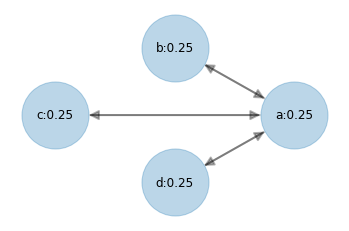

In [3]:
G = create_graph(4)

G.add_edge('a', 'b')
G.add_edge('b', 'a')
G.add_edge('a', 'c')
G.add_edge('c', 'a')
G.add_edge('a', 'd')
G.add_edge('d', 'a')

plot(G)

In [4]:
ranks = run_page_rank(G)
display(ranks)
ranks = pd.Series(ranks).sort_values(ascending=False)
ranks

{'a': 0.47082551312923326,
 'b': 0.1763914956235889,
 'c': 0.1763914956235889,
 'd': 0.1763914956235889}

a    0.470826
d    0.176391
c    0.176391
b    0.176391
dtype: float64

In [5]:
sum(ranks)

1.0

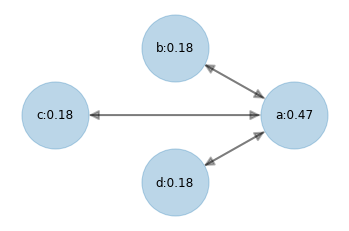

In [6]:
plot(G)

### What if you want to time it?

In [7]:
%%timeit
G = create_graph(4)

G.add_edge('a', 'b')
G.add_edge('b', 'a')
G.add_edge('a', 'c')
G.add_edge('c', 'a')
G.add_edge('a', 'd')
G.add_edge('d', 'a')

ranks = run_page_rank(G)

7.89 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercise 1 (Worth 8 points)
Apply page rank to two graphs that you create with 6 nodes each. 
* Graph 1: Approximately every page should be of relatively equal importance
* Graph 2: Contain some structure (or important nodes). 
Write up a brief discussion about what page rank is showing about your graphs. I want to see graphs and discussions that reference your graphs. 

In graph 1, page rank is showing that the nodes are roughly equal, each node within 5% percent importance of the node previous. If we wanted each node to be of equal importance perfectly, we could have maybe a one-directional cyclic graph where each node had one incoming path and one outgoing path. We see here that node d is the most important because it has 2 incoming edges and no outgoing edges whereas all other nodes have only 1 incoming edge. 

In graph 2, node a is the most important because all other nodes funnel to node a whether it is directly or through another node. The bottom 4 nodes have no incoming edges in comparison to node a. Also, node a is the most important node because it has not outgoing edges. 

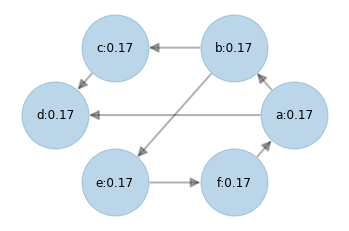

{'a': 0.19935080287650309,
 'b': 0.144920398034055,
 'c': 0.12178806719011073,
 'd': 0.24843870535041945,
 'e': 0.12178806719011073,
 'f': 0.16371395935880104}

d    0.248439
a    0.199351
f    0.163714
b    0.144920
e    0.121788
c    0.121788
dtype: float64

1.0

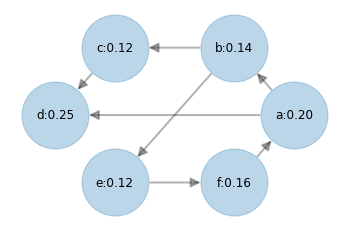

In [8]:
# Graph 1

G = create_graph(6)

G.add_edge('a', 'b')
G.add_edge('b', 'c')
G.add_edge('c', 'd')
G.add_edge('a', 'd')
G.add_edge('b', 'e')
G.add_edge('e', 'f')
G.add_edge('f', 'a')

plot(G)
ranks = run_page_rank(G)
display(ranks)
ranks = pd.Series(ranks).sort_values(ascending=False)
display(ranks)
display(sum(ranks))
plot(G)

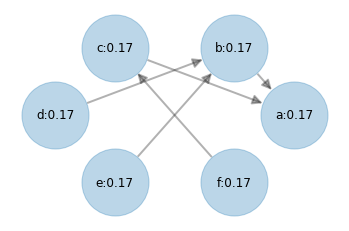

{'a': 0.3919781955722829,
 'b': 0.21743342472288074,
 'c': 0.14898409341049693,
 'd': 0.08053476209811308,
 'e': 0.08053476209811308,
 'f': 0.08053476209811308}

a    0.391978
b    0.217433
c    0.148984
f    0.080535
e    0.080535
d    0.080535
dtype: float64

0.9999999999999997

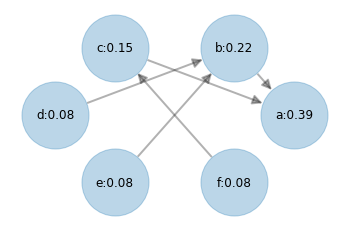

In [9]:
# Graph 2

G = create_graph(6)

G.add_edge('b', 'a')
G.add_edge('c', 'a')
G.add_edge('d', 'b')
G.add_edge('e', 'b')
G.add_edge('f', 'c')


plot(G)
ranks = run_page_rank(G)
display(ranks)
ranks = pd.Series(ranks).sort_values(ascending=False)
display(ranks)
display(sum(ranks))
plot(G)

## Exercise 2 (Worth 3 points)
Now let's load up a real dataset that contains information about web pages. This dataset is a webcrawl using links that go through epa.gov (warning... it's a bit old). Run and study the code below. Then answer the questions at the end.

In [10]:
!head ~/csc-466-student/data/epa-webcrawl/gr0.epa.txt

head: cannot open '/home/jovyan/csc-466-student/data/epa-webcrawl/gr0.epa.txt' for reading: No such file or directory


In [11]:
!tail ~/csc-466-student/data/epa-webcrawl/gr0.epa.txt

tail: cannot open '/home/jovyan/csc-466-student/data/epa-webcrawl/gr0.epa.txt' for reading: No such file or directory


In [12]:
nodes = {}
edges = {}
for line in open("gr0.epa.txt").readlines():
    fields = line.strip().split(" ")
    if line[0] == "n":
        nodes[fields[1]] = fields[2]
    elif line[0] == "e":
        if fields[1] not in edges:
            edges[fields[1]] = []
        edges[fields[1]].append(fields[2])

In [13]:
len(list(nodes.keys()))

4772

In [14]:
pd.Series(nodes)

0                            http://earthvision.svsu.edu/
1                            http://laedu.lalc.k12.ca.us/
2                             http://pipes.ehsg.saic.com/
3                            http://epaserver.ciesin.org/
4                               http://www.nnic.noaa.gov/
                              ...                        
4767                       http://www.shopcalifornia.com/
4768     http://www.nuwc.navy.mil/hq/webmaster/okmem.html
4769                    http://www.kiosksanfrancisco.com/
4770    http://fwgcom.wes.army.mil/fwg/environ/WebSite...
4771     http://www.nuwc.navy.mil/hq/library/navlink.html
Length: 4772, dtype: object

In [15]:
pd.Series(edges)

0       [216, 217, 218, 219, 220, 221, 222, 223, 224, ...
1       [251, 252, 253, 254, 255, 256, 257, 258, 259, ...
2                                                   [290]
3                                         [330, 221, 331]
4       [380, 381, 382, 383, 384, 385, 386, 387, 388, ...
                              ...                        
4765    [3427, 499, 3428, 3429, 3430, 3431, 3432, 132,...
4766                                               [3426]
4767                                               [3426]
4768                        [4760, 4107, 2231, 948, 1319]
4771    [3429, 3430, 3431, 3434, 1238, 3432, 132, 3428...
Length: 1423, dtype: object

In [16]:
node_names = list(nodes.keys())
G = create_graph(len(node_names),names=node_names)

for u in edges.keys():
    for v in edges[u]:
        G.add_edge(u,v)

### Example to show you how long it took me to run it

In [17]:
%%timeit -n 1 -r 1
run_page_rank(G)

4min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Now run it for real and get the ranks

In [18]:
ranks = run_page_rank(G)

In [19]:
ranks = pd.Series(ranks).sort_values(ascending=False)

In [20]:
ranks

1247    0.019097
2838    0.018909
967     0.006302
708     0.005561
287     0.005124
          ...   
1437    0.000145
1438    0.000145
1440    0.000145
1442    0.000145
0       0.000145
Length: 4772, dtype: float64

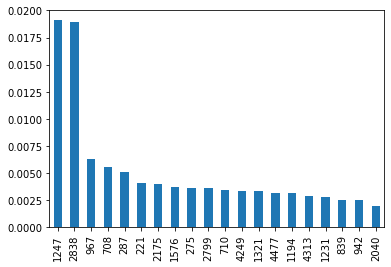

In [21]:
ranks.iloc[:20].plot.bar()

In [22]:
df = pd.Series(nodes).to_frame()
df.columns = ["URL"]
ranks.name = "PageRank"
df = df.join(ranks)

In [23]:
df

,URL,PageRank
0,http://earthvision.svsu.edu/,0.000145
1,http://laedu.lalc.k12.ca.us/,0.000145
2,http://pipes.ehsg.saic.com/,0.000145
3,http://epaserver.ciesin.org/,0.000639
4,http://www.nnic.noaa.gov/,0.000145
...,...,...
4767,http://www.shopcalifornia.com/,0.000145
4768,http://www.nuwc.navy.mil/hq/webmaster/okmem.html,0.000145
4769,http://www.kiosksanfrancisco.com/,0.000145
4770,http://fwgcom.wes.army.mil/fwg/environ/WebSite...,0.000145


In [24]:
df.sort_values(by="PageRank",ascending=False)

,URL,PageRank
1247,http://www.nbs.gov/,0.019097
2838,http://www.usgs.gov/,0.018909
967,http://home.netscape.com/comprod/mirror/index....,0.006302
708,http://home.netscape.com/,0.005561
287,http://www.whitehouse.gov,0.005124
...,...,...
1514,http://www.the-spa.com/dpw/srwtf20.htm,0.000145
1513,http://ren.glaci.com/info/sites/othersites.html,0.000145
1512,http://www.envirite.com/links.htm,0.000145
1511,http://www-erd.llnl.gov/orad/ppg_pages/other_r...,0.000145


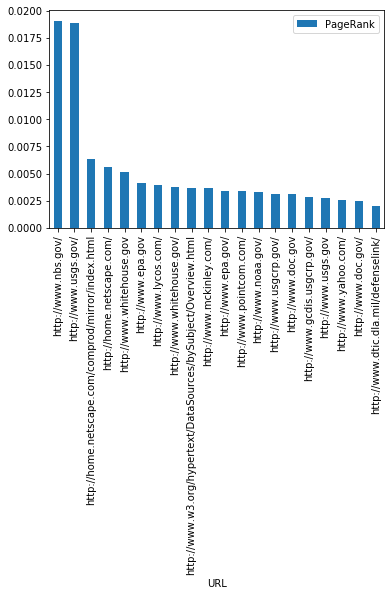

In [25]:
df.sort_values(by="PageRank",ascending=False).set_index("URL").iloc[:20].plot.bar()

**Questions**

1. Do you think we converged? How would you show me you had either converged or not converged?
2. Run your experiment to see if we converged.
2. Assuming we've converged, what does the bar chart above tell you about the webpages? 



1. I think we have converged. We could run one more iteration and compare the new Page Rank values to the values after 20 iterations.

2. After running one more iteration, it appears that we have converged.

3. The first 2 webpages are by far the most important of the webpages listed in the data. After the first 2 sites, there is a big dropoff in the PageRank. 

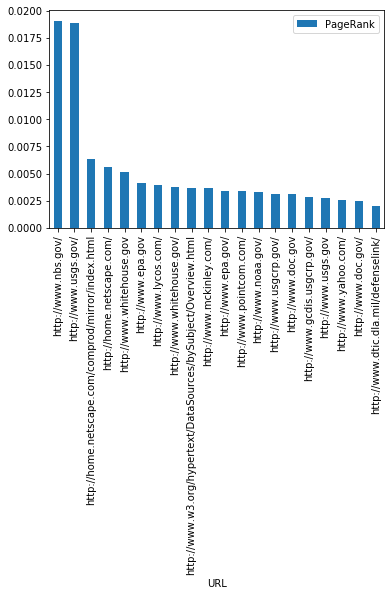

In [27]:
new_ranks = run_page_rank(G, 21)
new_ranks = pd.Series(new_ranks).sort_values(ascending=False)
df = pd.Series(nodes).to_frame()
df.columns = ["URL"]
ranks.name = "PageRank"
df = df.join(ranks)
df.sort_values(by="PageRank", ascending=False).set_index("URL").iloc[:20].plot.bar()